Import libraries

In [1]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

print(torch.__version__)
print(fastai.__version__)

1.12.1+cu113
2.7.10


Download OIDv4_Toolkit

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git  # download files

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 28.44 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cd OIDv4_ToolKit && pip3 install -r requirements.txt  # download required libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 8.1 MB/s 
     |████████████████████████████████| 548 kB 55.9 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 662 kB 56.7 MB/s 
     |████████████████████████████████| 10.2 MB 55.4 MB/s 
     |████████████████████████████████| 140 kB 64.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


In [4]:
!cd OIDv4_ToolKit && python main.py -h  # functions in main.py

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

In [5]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Fruit Person Book --type_csv train --limit 400  # download dataset


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Fruit.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 63668 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

Deep Learning

In [12]:
path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)    # check fails
# failed

different = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

dls = different.dataloaders(path)

# dls.train.show_batch(max_n=32, nrows=4)   # check dataset

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(7)   # train

epoch,train_loss,valid_loss,accuracy,time
0,1.042224,0.458942,0.854167,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.479076,0.455263,0.862500,00:27
1,0.332353,0.410376,0.866667,00:25
2,0.232457,0.583299,0.862500,00:25
3,0.177825,0.540327,0.862500,00:25
4,0.135296,0.509891,0.875000,00:26
5,0.106151,0.516846,0.875000,00:25
6,0.088606,0.516766,0.879167,00:23


Evaluation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()   # confusion matrix

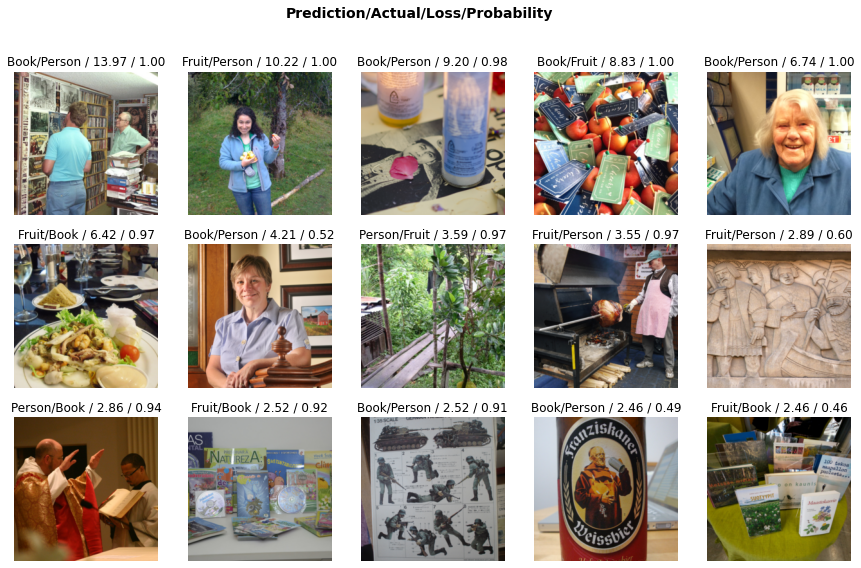

In [15]:
interp.plot_top_losses(15, nrows=3)   # the most lossed predicts

In [18]:
upload = widgets.FileUpload()   # file uploader
upload

FileUpload(value={}, description='Upload')

Bashorat: Book
Ehtimollik: 100.0%


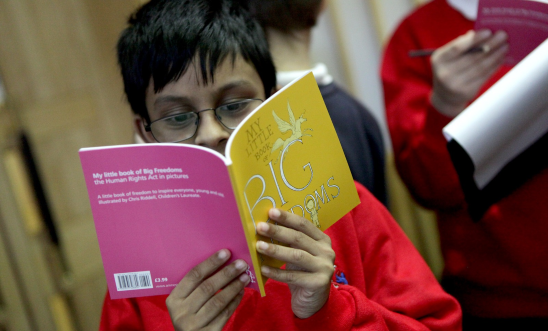

In [21]:
img = PILImage.create(upload.data[-1])   # read image
pred, pred_id, probs = learn.predict(img)  # predict
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.1f}%')
img

Save model

In [22]:
learn.export('different_model.pkl')

Check model

In [23]:
model = load_learner("/content/different_model.pkl")
model.predict(img)

('Book', TensorBase(0), TensorBase([9.9984e-01, 6.7590e-05, 9.3598e-05]))